In [7]:
from TdCARS import TdCARS
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

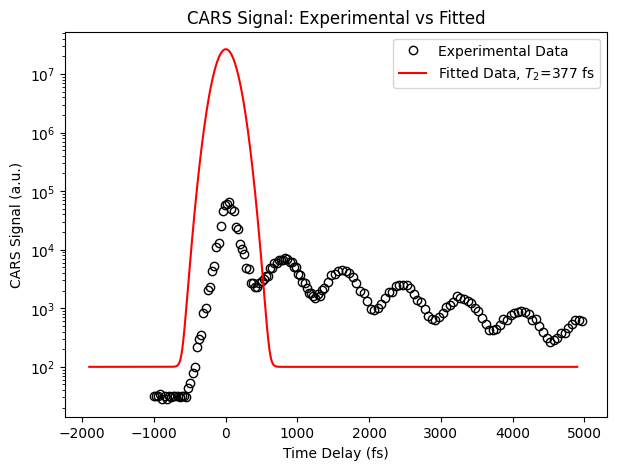

(array([-1900, -1895, -1890, ...,  4890,  4895,  4900], shape=(1361,)),
 array([100., 100., 100., ..., 100., 100., 100.], shape=(1361,)))

In [8]:
file_path = r"D:\Academic\URI\Research\Data_and_Results\experimental_data\CARS\2026\Feb_19\PETN_4.dat"

tdcars = TdCARS.from_file(file_path)

tdcars.CARS_simulation_FG(showPlot=True)

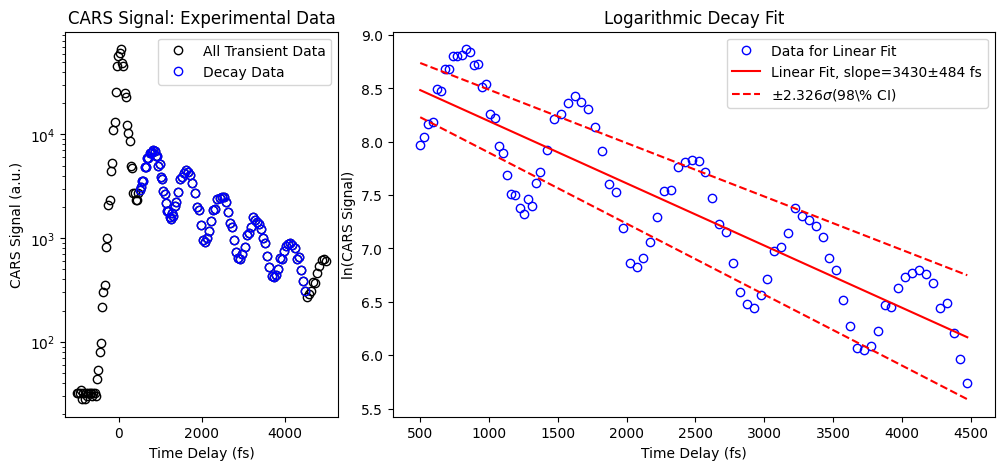

(np.float64(3430.169353338981), np.float64(483.94572653980634))

In [9]:
tdcars.get_T2(td1=500, td2=4500, show_plot=True)

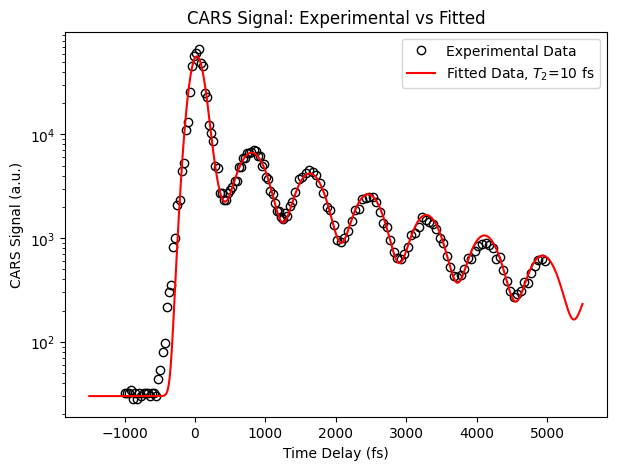

In [65]:
tdcars.tp1, tdcars.tp2, tdcars.tp3 = 100, 200, 200
tdcars.tmin, tdcars.tmax = -2500, 6500
tdcars.floor = 30
nuR = 1200
del_nuR = 20.2
t2 = 3550
del_t2 = -5
tdcars.nuR1 = np.array([nuR, nuR-del_nuR, nuR+del_nuR])
tdcars.T21 = np.array([10, t2-del_t2, t2+del_t2])
tdcars.A1 = np.array([3e24, 2.13E22, 4.44E22]) * 0.4
tdcars.phi=0
td_fit, sig_fit = tdcars.CARS_simulation_FG(showPlot=True)

In [66]:
tdcars.get_R2()

np.float64(0.9895009766470273)

In [61]:
arr1 = np.linspace(22.25, 22.35, 20)
arr2 = np.linspace(22.6, 22.7, 20)
r2_max = 0
arr = []
for A1 in arr1:
    for A2 in arr2:
        tdcars.tp1, tdcars.tp2, tdcars.tp3 = 100, 200, 200
        tdcars.tmin, tdcars.tmax = -2500, 6500
        tdcars.floor = 30
        nuR = 1200
        del_nuR = 20.2
        t2 = 3550
        del_t2 = 0
        tdcars.nuR1 = np.array([nuR, nuR-del_nuR, nuR+del_nuR])
        tdcars.T21 = np.array([10, t2-del_t2, t2+del_t2])
        tdcars.A1 = np.array([3e24, 10**A1, 10**A2]) * 0.4
        tdcars.phi=0
        td_fit, sig_fit = tdcars.CARS_simulation_FG(showPlot=False)
        r2 = tdcars.get_R2()
        if r2 > r2_max:
            r2_max = r2
            arr = [A1, A2]

In [64]:
[10**i for i in arr]

[np.float64(2.185111910217721e+22), np.float64(4.439851260479013e+22)]

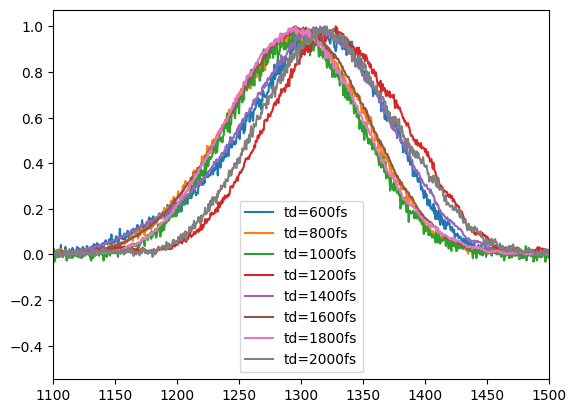

In [12]:
td_arr = np.array([600,800,1000,1200,1400,1600,1800,2000])
for td in td_arr:
    sig = tdcars.plot_spectra_at_td(td)
    plt.plot(tdcars.wn_as, sig/np.max(sig), label=f"td={int(td)}fs")
plt.legend()
plt.xlim([1100, 1500])
plt.show()